<a href="https://colab.research.google.com/github/arielle00/CMPE257-Fall23-Arielle-Shnayder/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1 - LP

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd


train_data = np.loadtxt("ZipDigits.train",delimiter=" ",usecols=range(0, 257))
test_data = np.loadtxt("ZipDigits.test",delimiter=" ",usecols=range(0, 257))

y_train = np.where(train_data[:, 0] == 1, 1, -1)
y_test = np.where(test_data[:, 0] == 1, 1, -1)

def calculate_intensity(image):
    return np.mean(image[1:])

def calculate_symmetry(image):
    image = image[1:]
    left = image[:int(256/2)]
    right = image[int(256/2):]
    symmetry = np.mean(np.abs(left - np.flip(right)))
    return symmetry

train_features = np.array([[calculate_intensity(x), calculate_symmetry(x)] for x in train_data])
test_features = np.array([[calculate_intensity(x), calculate_symmetry(x)] for x in test_data])

In [11]:
def train_and_evaluate_svm(X, y, kernel_type, degree=None):
    if kernel_type == 'poly' and degree is not None:
        svm_model = SVC(kernel=kernel_type, degree=degree,C=1)
    else:
        svm_model = SVC(kernel=kernel_type,C=1)

    svm_model.fit(X, y)
    y_pred_train = svm_model.predict(X)
    train_error = 1 - accuracy_score(y, y_pred_train)

    return train_error

error_linear = train_and_evaluate_svm(train_features, y_train, 'linear')
error_poly = train_and_evaluate_svm(train_features, y_train, 'poly', degree=3)
error_rbf = train_and_evaluate_svm(train_features, y_train, 'rbf')

print("Training Error (Linear):", error_linear)
print("Training Error (Poly 3rd order):", error_poly)
print("Training Error (RBF):", error_rbf)


Training Error (Linear): 0.01906460019201761
Training Error (Poly 3rd order): 0.020161843368536547
Training Error (RBF): 0.017281580030174215


Task 1 - HP
 - Best model is the RBF because the training error is the smallest of the three models. This is not an appropriate way to select a model because training error alone is not enough to make our decision. We need to consider the validation error and test error as well.

Task 2 - LP 1

In [12]:
def perform_cross_validation(X, y, kernel_type, c_values, degree=None):
    cv_scores = {}

    for c in c_values:
        if kernel_type == 'poly' and degree is not None:
            svm_model = SVC(kernel=kernel_type, degree=degree, C=c)
        else:
            svm_model = SVC(kernel=kernel_type, C=c)

        scores = cross_val_score(svm_model, X, y, cv=5)
        cv_scores[c] = 1 - np.mean(scores)

    return cv_scores

c_values = [0.01, 0.1, 1, 10, 100]

# Corrected function calls
cv_error_linear = perform_cross_validation(train_features, y_train, 'linear', c_values)
cv_error_poly = perform_cross_validation(train_features, y_train, 'poly', c_values, degree=3)
cv_error_rbf = perform_cross_validation(train_features, y_train, 'rbf', c_values)

print("CV Score (Linear):", cv_error_linear)
print("CV Score (Poly 3rd order):", cv_error_poly)
print("CV Score (RBF):", cv_error_rbf)

CV Score (Linear): {0.01: 0.13784118441798743, 0.1: 0.019201851052687458, 1: 0.01906467684143931, 10: 0.019201851052687458, 100: 0.019201851052687458}
CV Score (Poly 3rd order): {0.01: 0.04197023159783042, 0.1: 0.0245513632333626, 1: 0.020436795031266164, 10: 0.02002536641685726, 100: 0.020162446608769535}
CV Score (RBF): {0.01: 0.019064770860775182, 0.1: 0.0186533422463665, 1: 0.017144331903299226, 10: 0.01700725171138695, 100: 0.017144331903299226}


Task 2 - LP 2
- The lowest cross-validation error is RBF kernel with a C value of 10

Task 2 - HP 1

In [13]:
def calculate_in_sample_error(X, y, model):
    y_pred = model.predict(X)
    in_sample_error = 1 - accuracy_score(y, y_pred)
    return in_sample_error

In [14]:
in_sample_errors_linear = {}
in_sample_errors_poly = {}
in_sample_errors_rbf = {}

for c in c_values:
    # Linear Kernel
    svm_linear = SVC(kernel='linear', C=c)
    svm_linear.fit(train_features, y_train)
    in_sample_errors_linear[c] = calculate_in_sample_error(train_features, y_train, svm_linear)

    # Polynomial Kernel
    svm_poly = SVC(kernel='poly', degree=3, C=c)
    svm_poly.fit(train_features, y_train)
    in_sample_errors_poly[c] = calculate_in_sample_error(train_features, y_train, svm_poly)

    # RBF Kernel
    svm_rbf = SVC(kernel='rbf', C=c)
    svm_rbf.fit(train_features, y_train)
    in_sample_errors_rbf[c] = calculate_in_sample_error(train_features, y_train, svm_rbf)

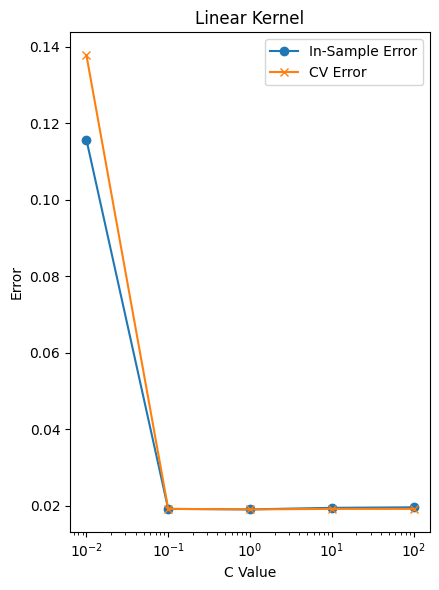

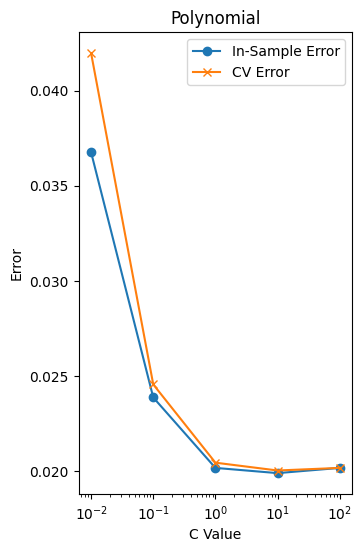

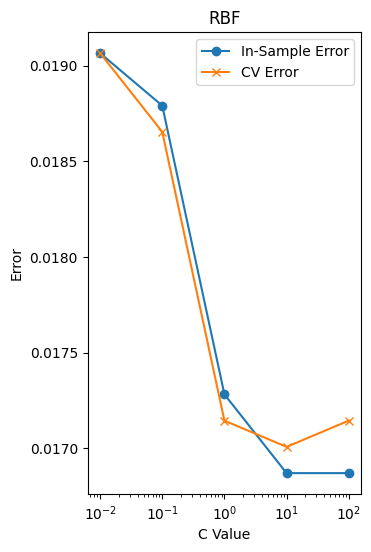

In [15]:
plt.figure(figsize=(12, 6))
#Linear Kernel
plt.subplot(1, 3, 1)
plt.plot(c_values, list(in_sample_errors_linear.values()), label='In-Sample Error', marker='o')
plt.plot(c_values, list(cv_error_linear.values()), label='CV Error', marker='x')
plt.title('Linear Kernel')
plt.xlabel('C Value')
plt.ylabel('Error')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
#Polynomial Kernel
plt.subplot(1, 3, 1)
plt.plot(c_values, list(in_sample_errors_poly.values()), label='In-Sample Error', marker='o')
plt.plot(c_values, list(cv_error_poly.values()), label='CV Error', marker='x')
plt.title('Polynomial')
plt.xlabel('C Value')
plt.ylabel('Error')
plt.xscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
#RBF Kernel
plt.subplot(1, 3, 1)
plt.plot(c_values, list(in_sample_errors_rbf.values()), label='In-Sample Error', marker='o')
plt.plot(c_values, list(cv_error_rbf.values()), label='CV Error', marker='x')
plt.title('RBF')
plt.xlabel('C Value')
plt.ylabel('Error')
plt.xscale('log')
plt.legend()
plt.show()

These plots show how good the C value for each kernel is. Starting with the linear, c=1 seems to be the best. For the polynomial kernel, c=10 seems to be the best and RBF c=10 also seems to be the best and have the lowest error for both validation and in sample.

Task 3 - LP 1

In [16]:
best_svm_model = SVC(kernel='rbf', C=10)
best_svm_model.fit(train_features, y_train)
y_pred_train = best_svm_model.predict(train_features)
train_error = 1 - accuracy_score(y_train, y_pred_train)
print("Train error:", train_error)

Train error: 0.016870113838979517


Task 3 - LP 2

In [17]:
y_pred_test = best_svm_model.predict(test_features)
test_error = 1 - accuracy_score(y_test, y_pred_test)
print("Test error:", test_error)

Test error: 0.02291978076731438


Task 4 - HP 1
-
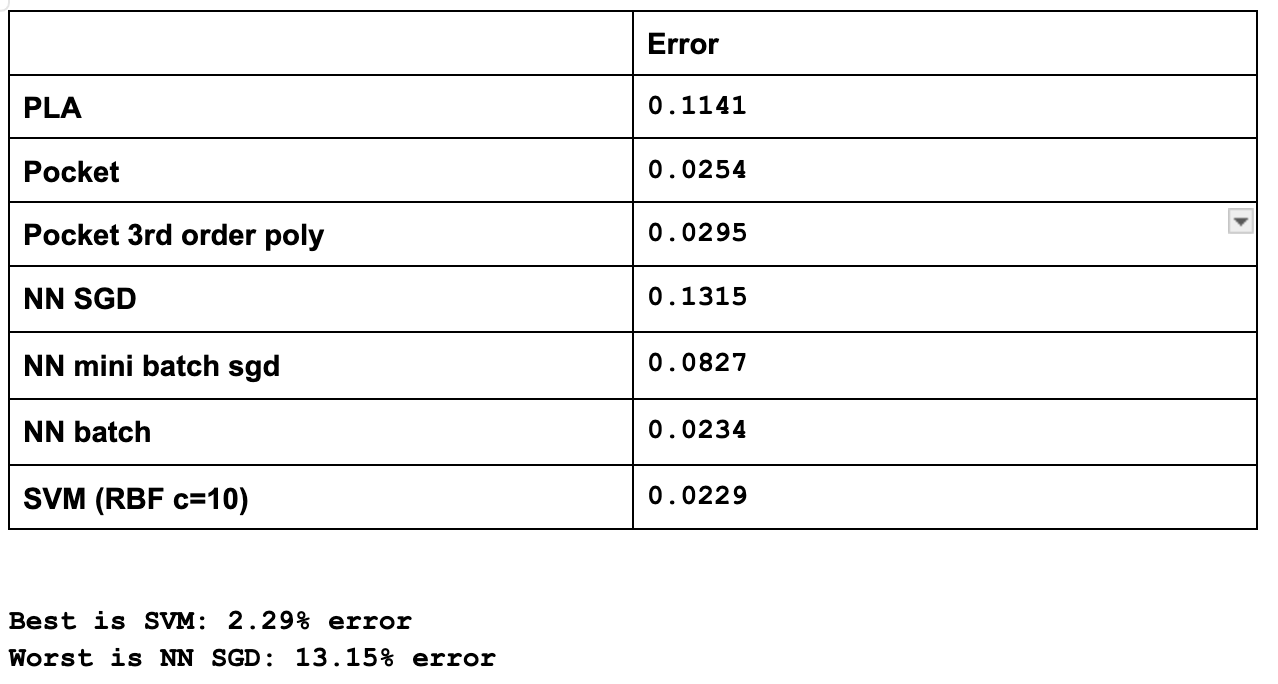

- SVM's are good at binary classification while NN is not as good and needs to tune many hyperparameters. Also SVM performs well because the data is pretty seperable. NN are too complex for this simple dataset.

Task 4 - HP 2
- This is a better way to choose the best digit classifier.
In summary, the best approach is to consider the complexity of the data, the simplicity versus performance trade-off, and the ability of the model to generalize well to new, unseen data. It’s also important to iterate and refine the model based on performance metrics and practical considerations. This dataset was pretty simple so choosing a simple model is best.